#  Anomaly & Fraud Detection – Statistical Methods
## Method: Z-Score and Thresholding
## 1. Objective

 Detect anomalies by measuring how many standard deviations  a data point is from the mean. This notebook treats Z-score  as a *risk signal*, not a hard classification rule.


# 2. When Z-Score Works (and When It Doesn't)
 Works well when:
- Data is approximately Gaussian
- Features are continuous and stable
- You need a simple, explainable baseline

 Limitations:
 
- Sensitive to outliers (mean & std shift)
- Poor performance on skewed or heavy-tailed data
 - Univariate by default

## 3. Imports and Setup


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

np.random.seed(2010)

#  4. Synthetic Example Dataset
 Simulate transaction amounts with injected anomalies

In [11]:
normal_transactions = np.random.normal(loc=100, scale=15, size=950)
anomalies = np.random.normal(loc=200, scale=10, size=50)

amounts = np.concatenate([normal_transactions, anomalies])

df = pd.DataFrame({
    "transaction_amount": amounts
})

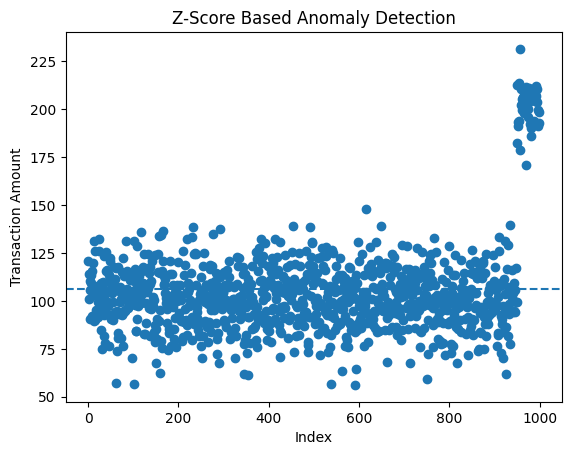

In [38]:
plt.figure()
plt.scatter(
    df.index,
    df["transaction_amount"]
)
plt.axhline(df["transaction_amount"].mean(), linestyle="--")
plt.title("Z-Score Based Anomaly Detection")
plt.xlabel("Index")
plt.ylabel("Transaction Amount")
plt.show()

## 5. Z-Score Calculation

In [14]:
df["z_score"] = zscore(df["transaction_amount"])

df.head()

,transaction_amount,z_score
0,120.990332,0.567235
1,113.869505,0.297274
2,100.894456,-0.194629
3,90.295948,-0.596433
4,110.473350,0.168521


## 6. Threshold-Based Detection
 Common statistical thresholds:
 |Z| > 2   → Moderate anomaly
 |Z| > 3   → Strong anomaly

In [22]:
Z_THRESHOLD = 3

df["is_anomaly"] = df["z_score"].abs() > Z_THRESHOLD

## 7. Inspect Detected Anomalies

In [25]:
df[df["is_anomaly"]].head()

,transaction_amount,z_score,is_anomaly,business_flag
951,212.619215,4.041018,True,True
952,190.942677,3.219229,True,True
953,193.462337,3.314753,True,True
954,194.043387,3.336782,True,True
955,213.744381,4.083675,True,True


## 8. Visualization

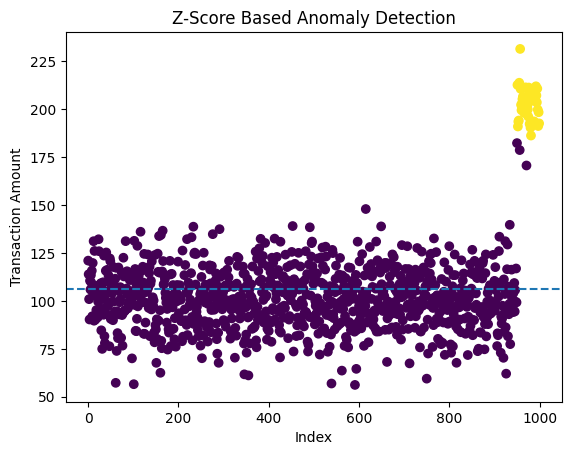

In [28]:
plt.figure()
plt.scatter(
    df.index,
    df["transaction_amount"],
    c=df["is_anomaly"].astype(int)
)
plt.axhline(df["transaction_amount"].mean(), linestyle="--")
plt.title("Z-Score Based Anomaly Detection")
plt.xlabel("Index")
plt.ylabel("Transaction Amount")
plt.show()

## 9. Business Rule Thresholding
Z-score should often be combined with domain rules
 Example: flag only large transactions that are also extreme

In [31]:
BUSINESS_AMOUNT_THRESHOLD = 150

df["business_flag"] = (
    (df["transaction_amount"] > BUSINESS_AMOUNT_THRESHOLD) &
    (df["z_score"].abs() > 2)
)

## 10. Comparison of Statistical vs Business Flags

In [34]:
comparison = df[["is_anomaly", "business_flag"]].value_counts()
comparison

is_anomaly  business_flag
False       False            950
True        True              47
False       True               3
Name: count, dtype: int64

## 11. Evaluation Notes (No Ground Truth)In unsupervised settings:
- Precision is often evaluated via manual review
- Recall is unknowable without labels
- Thresholds must be validated historically

# 12. Key Takeaways
- Z-score is a strong baseline, not a final solution
- Always check distributional assumptions
- Combine with robust statistics or ML methods
- Treat outputs as *risk scores*, not absolute truth


# 13. Next Steps
- Move to IQR and robust statistics
- Apply rolling Z-scores for time series
- Extend to multivariate anomaly detection